In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import Data/merged_and_cleaned_data.csv
df = pd.read_csv('Data/merged_and_cleaned_data.csv')


In [4]:
#take a sample of 1000 rows
df_sample = df.head(1000)

#export the sample to Data/sample_data.csv

In [5]:
df_sample.to_csv('Data/sample_data.csv', index=False)

In [7]:
#change settings to display all columns
pd.set_option('display.max_columns', None)

In [8]:
df_sample

,Unnamed: 0,ObjectId,Date,ExecutedCount|Ask,ExecutedVolume|Ask,ExecutedCount|Bid,ExecutedVolume|Bid,QuoteToTrade,TradeCount|Dark,TradeNotional|Dark,TradeVolume|Dark,TradeCount|Lit,TradeNotional|Lit,TradeVolume|Lit,TradeCount|Bi,TradeNotional|Bi,TradeVolume|Bi,TradeCount|Non,TradeNotional|Non,TradeVolume|Non,Spread|AbsLastTicks,Spread|AbsMeanTicks,Spread|AbsTWATicks,Spread|AbsVWATicks,Spread|AbsLast,Spread|AbsMean,Spread|RelLast,Spread|RelMean,Spread|RelTWA,Spread|RelVWA,Spread|AbsTWA,Spread|AbsVWA,MIC
0,0.0,378320396,2022-04-21,171.0,18160.0,206.0,15116.0,37.123675,0.0,0.0,0.0,324.0,1544302.65,30664.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.322598,2.195458,2.295832,0.10,0.179409,19.900498,35.697271,34.542486,38.416442,0.173571,0.193387,XWBO
1,1.0,378320397,2022-04-21,114.0,2179.0,145.0,3475.0,57.069767,0.0,0.0,0.0,216.0,808817.20,4664.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.686354,2.285321,3.091760,0.40,0.537271,23.014960,31.009574,26.361832,35.695723,0.457064,0.618352,XWBO
2,2.0,378320398,2022-04-21,594.0,214531.0,515.0,197181.0,38.236633,0.0,0.0,0.0,954.0,7955666.16,310159.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.311597,2.059402,2.547569,0.02,0.046232,7.766990,18.039498,16.006659,19.843929,0.041188,0.050951,XWBO
3,3.0,378320399,2022-04-21,23.0,434.0,9.0,446.0,26.148148,0.0,0.0,0.0,28.0,31146.40,776.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.890244,3.556415,4.175386,0.60,0.389024,149.625935,97.029793,88.678021,104.176993,0.355641,0.417539,XWBO
4,4.0,378320400,2022-04-21,112.0,25931.0,106.0,24475.0,46.186567,0.0,0.0,0.0,150.0,872920.20,36742.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.505051,1.428546,1.635950,0.05,0.075253,20.942408,31.661238,30.027170,34.407578,0.071427,0.081798,XWBO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995.0,378320410,2022-05-11,11.0,771.0,9.0,1049.0,65.700000,0.0,0.0,0.0,11.0,45046.70,1067.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,8.313725,5.632007,8.308456,1.20,0.831373,287.081340,199.042343,134.601085,199.123585,0.563201,0.830846,XWBO
996,996.0,378320413,2022-05-11,119.0,15117.0,90.0,11695.0,26.054795,0.0,0.0,0.0,168.0,492269.45,22124.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.438827,2.382460,2.702690,0.15,0.121941,66.889632,55.109763,53.967522,61.057791,0.119123,0.135134,XWBO
997,997.0,378320416,2022-05-11,153.0,13187.0,116.0,12152.0,22.835749,0.0,0.0,0.0,242.0,551964.70,23670.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.850584,2.772902,3.112438,0.25,0.142529,107.642626,61.254342,59.575179,66.862038,0.138645,0.155622,XWBO
998,998.0,378320419,2022-05-11,960.0,119137.0,836.0,115099.0,48.569444,0.0,0.0,0.0,1546.0,12939722.15,151017.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.801385,3.354217,4.297675,0.20,0.190069,23.310023,22.457621,19.847071,25.399940,0.167711,0.214884,XWBO


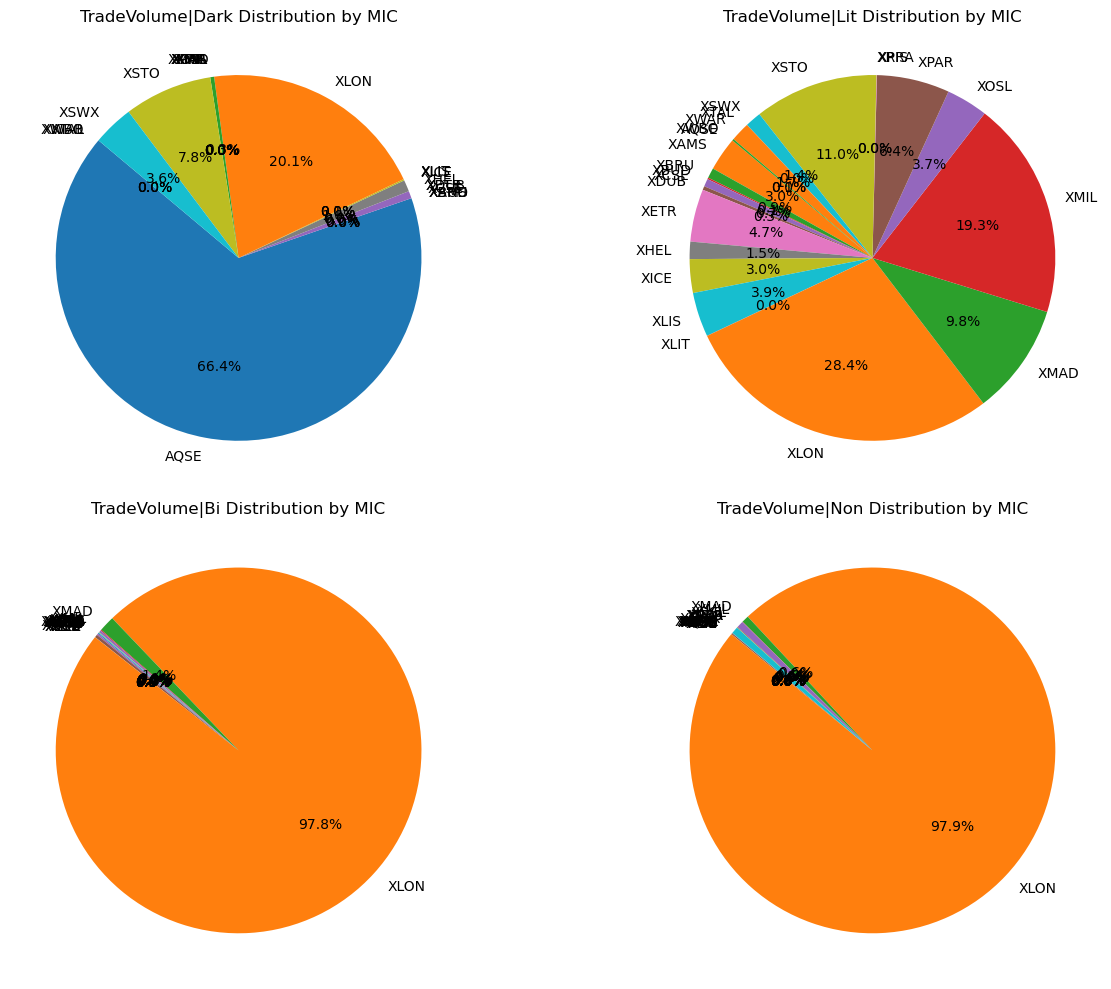

In [36]:
import matplotlib.pyplot as plt

# Grouping the data by MIC and summing up the volumes for each category
grouped_data = df.groupby('MIC').agg({'TradeVolume|Dark': 'sum', 
                                        'TradeVolume|Lit': 'sum', 
                                        'TradeVolume|Bi': 'sum', 
                                        'TradeVolume|Non': 'sum'}).reset_index()

# Creating pie charts for each trade volume type
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# TradeVolume|Dark Pie Chart
axes[0, 0].pie(grouped_data['TradeVolume|Dark'], labels=grouped_data['MIC'], autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('TradeVolume|Dark Distribution by MIC')

# TradeVolume|Lit Pie Chart
axes[0, 1].pie(grouped_data['TradeVolume|Lit'], labels=grouped_data['MIC'], autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('TradeVolume|Lit Distribution by MIC')

# TradeVolume|Bi Pie Chart
axes[1, 0].pie(grouped_data['TradeVolume|Bi'], labels=grouped_data['MIC'], autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title('TradeVolume|Bi Distribution by MIC')

# TradeVolume|Non Pie Chart
axes[1, 1].pie(grouped_data['TradeVolume|Non'], labels=grouped_data['MIC'], autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('TradeVolume|Non Distribution by MIC')

plt.tight_layout()
#save the plot to Plots/TradeVolume_by_MIC.png
plt.savefig('Plots/TradeVolume_by_MIC.png')

plt.show()




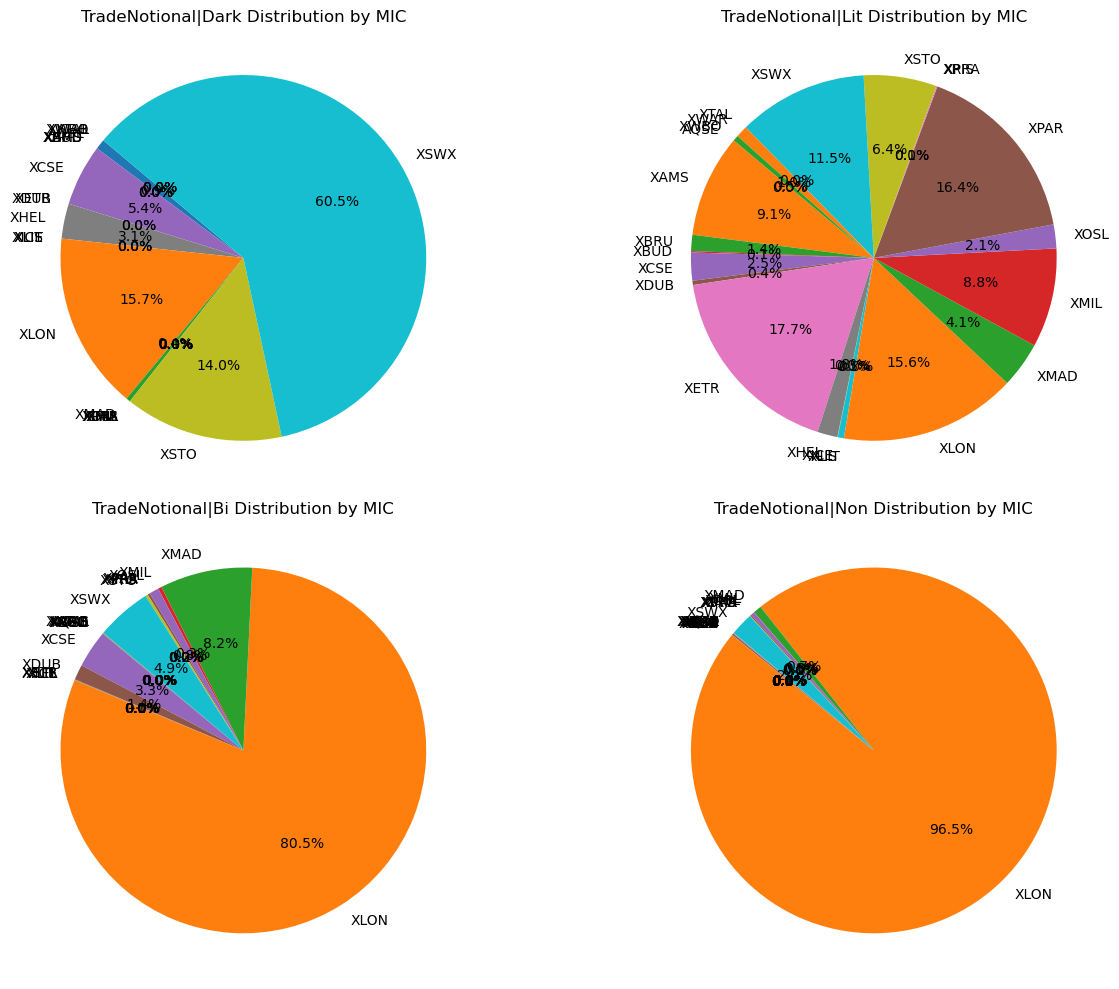

In [35]:
import matplotlib.pyplot as plt

# Grouping the data by MIC and summing up the notional and count for each category
grouped_data_notional = df.groupby('MIC').agg({'TradeNotional|Dark': 'sum', 
                                                 'TradeNotional|Lit': 'sum', 
                                                 'TradeNotional|Bi': 'sum', 
                                                 'TradeNotional|Non': 'sum'}).reset_index()


# Creating pie charts for each trade notional type
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# TradeNotional|Dark Pie Chart
axes[0, 0].pie(grouped_data_notional['TradeNotional|Dark'], labels=grouped_data_notional['MIC'], autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('TradeNotional|Dark Distribution by MIC')

# TradeNotional|Lit Pie Chart
axes[0, 1].pie(grouped_data_notional['TradeNotional|Lit'], labels=grouped_data_notional['MIC'], autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('TradeNotional|Lit Distribution by MIC')

# TradeNotional|Bi Pie Chart
axes[1, 0].pie(grouped_data_notional['TradeNotional|Bi'], labels=grouped_data_notional['MIC'], autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title('TradeNotional|Bi Distribution by MIC')

# TradeNotional|Non Pie Chart
axes[1, 1].pie(grouped_data_notional['TradeNotional|Non'], labels=grouped_data_notional['MIC'], autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('TradeNotional|Non Distribution by MIC')

#save the plot to Plots/TradeNotional_by_MIC.png
plt.savefig('Plots/TradeNotional_by_MIC.png')

plt.tight_layout()
plt.show()




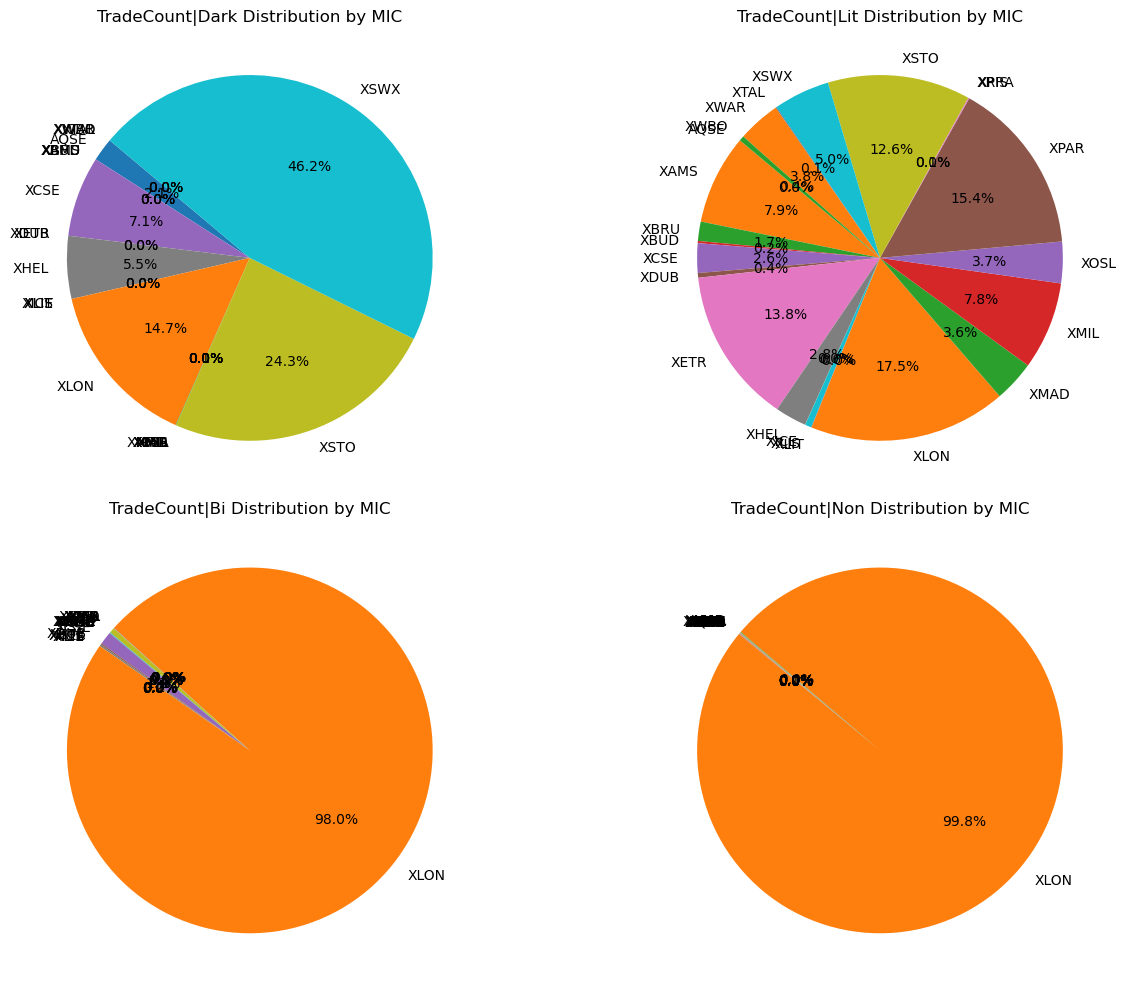

In [37]:
grouped_data_count = df.groupby('MIC').agg({'TradeCount|Dark': 'sum', 
                                              'TradeCount|Lit': 'sum', 
                                              'TradeCount|Bi': 'sum', 
                                              'TradeCount|Non': 'sum'}).reset_index()

# Creating pie charts for each trade count type
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# TradeCount|Dark Pie Chart
axes[0, 0].pie(grouped_data_count['TradeCount|Dark'], labels=grouped_data_count['MIC'], autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('TradeCount|Dark Distribution by MIC')

# TradeCount|Lit Pie Chart
axes[0, 1].pie(grouped_data_count['TradeCount|Lit'], labels=grouped_data_count['MIC'], autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('TradeCount|Lit Distribution by MIC')

# TradeCount|Bi Pie Chart
axes[1, 0].pie(grouped_data_count['TradeCount|Bi'], labels=grouped_data_count['MIC'], autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title('TradeCount|Bi Distribution by MIC')

# TradeCount|Non Pie Chart
axes[1, 1].pie(grouped_data_count['TradeCount|Non'], labels=grouped_data_count['MIC'], autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('TradeCount|Non Distribution by MIC')

plt.tight_layout()
#save the plot to Plots/TradeCount_by_MIC.png
plt.savefig('Plots/TradeCount_by_MIC.png')

plt.show()



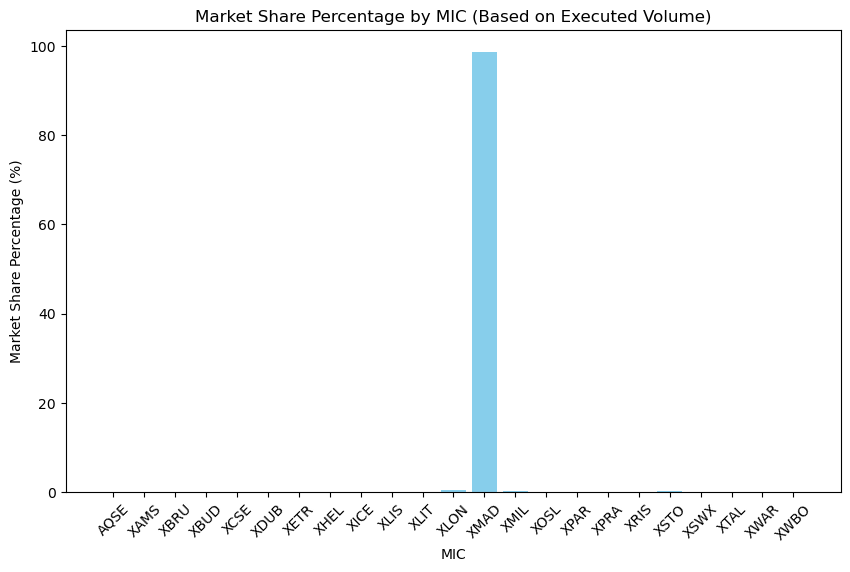

In [38]:
import matplotlib.pyplot as plt

# Calculate total trade volume for each MIC
total_trade_volume_by_MIC = df.groupby('MIC').agg({'ExecutedVolume|Ask': 'sum', 'ExecutedVolume|Bid': 'sum'}).sum(axis=1)
total_trade_volume = total_trade_volume_by_MIC.sum()

# Calculate market share percentage for each MIC
market_share_percentage = (total_trade_volume_by_MIC / total_trade_volume) * 100

# Create a histogram for the percentage of market share from each MIC
plt.figure(figsize=(10, 6))
plt.bar(market_share_percentage.index, market_share_percentage.values, color='skyblue')
plt.xlabel('MIC')
plt.ylabel('Market Share Percentage (%)')
plt.title('Market Share Percentage by MIC (Based on Executed Volume)')
plt.xticks(rotation=45)
#save the plot to Plots/MarketShare_by_MIC.png
plt.savefig('Plots/MarketShare_by_MIC_(ExecutedVolume).png')
plt.show()



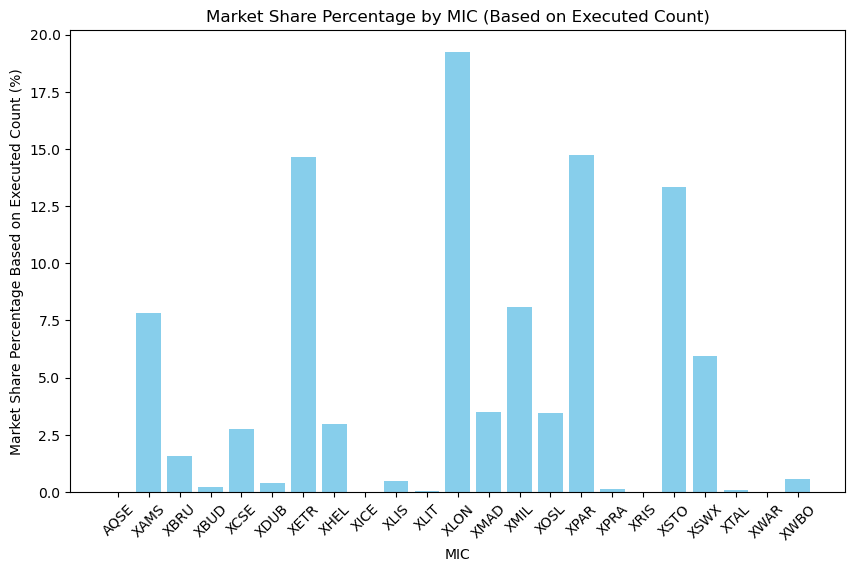

In [39]:
import matplotlib.pyplot as plt

# Calculate total executed count for each MIC
total_executed_count_by_MIC = df.groupby('MIC').agg({'ExecutedCount|Ask': 'sum', 'ExecutedCount|Bid': 'sum'}).sum(axis=1)
total_executed_count = total_executed_count_by_MIC.sum()

# Calculate market share percentage for each MIC based on executed count
market_share_percentage_count = (total_executed_count_by_MIC / total_executed_count) * 100

# Create a histogram for the percentage of market share from each MIC based on executed count
plt.figure(figsize=(10, 6))
plt.bar(market_share_percentage_count.index, market_share_percentage_count.values, color='skyblue')
plt.xlabel('MIC')
plt.ylabel('Market Share Percentage Based on Executed Count (%)')
plt.title('Market Share Percentage by MIC (Based on Executed Count)')
plt.xticks(rotation=45)
#save the plot to Plots/MarketShare_by_MIC_(ExecutedCount).png
plt.savefig('Plots/MarketShare_by_MIC_(ExecutedCount).png')
plt.show()



In [21]:
#set the dataframes to display all rows
pd.set_option('display.max_rows', None)

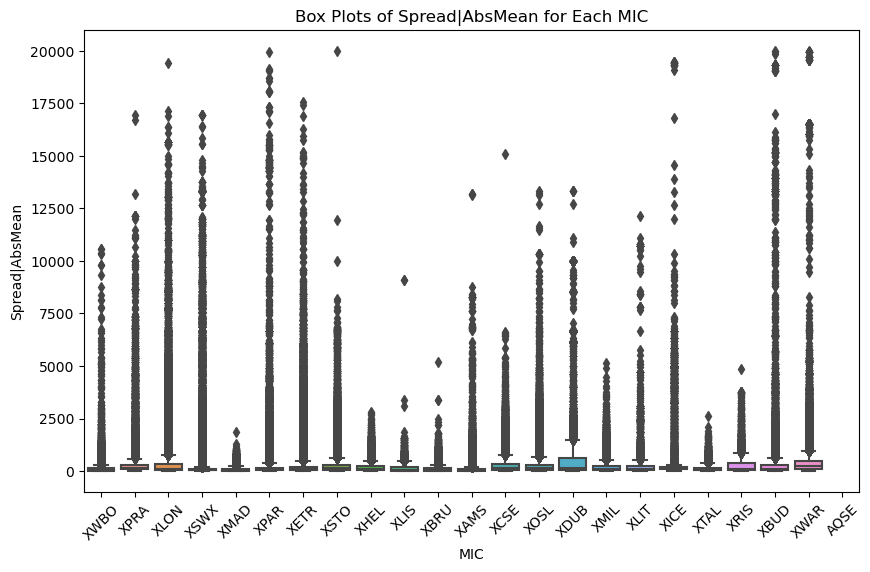

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for 'Spread|RelMean' grouped by 'MIC'
plt.figure(figsize=(10, 6))
sns.boxplot(x='MIC', y='Spread|RelMean', data=df)
plt.title('Box Plots of Spread|RelMean for Each MIC')
plt.xlabel('MIC')
plt.ylabel('Spread|RelMean')
plt.xticks(rotation=45)
plt.show()


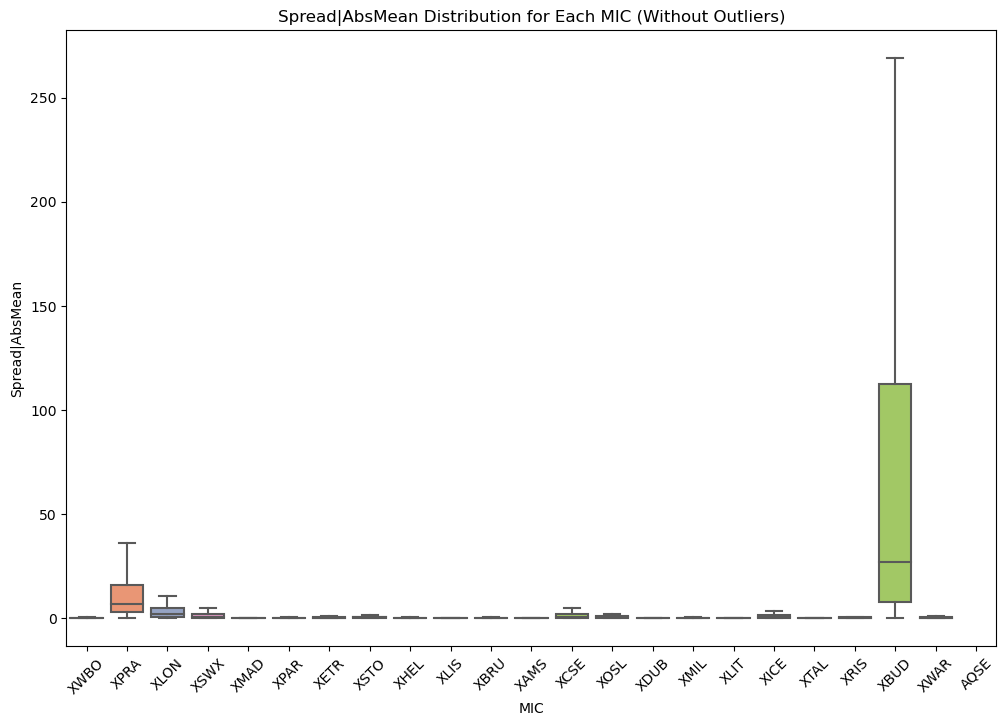

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting Spread|AbsMean for each MIC without outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='MIC', y='Spread|AbsMean', palette='Set2', showfliers=False)
plt.title('Spread|AbsMean Distribution for Each MIC (Without Outliers)')
plt.xlabel('MIC')
plt.ylabel('Spread|AbsMean')
plt.xticks(rotation=45)
#save the plot to Plots/Spread_AbsMean_by_MIC.png
plt.savefig('Plots/Spread_AbsMean_by_MIC.png')
plt.show()




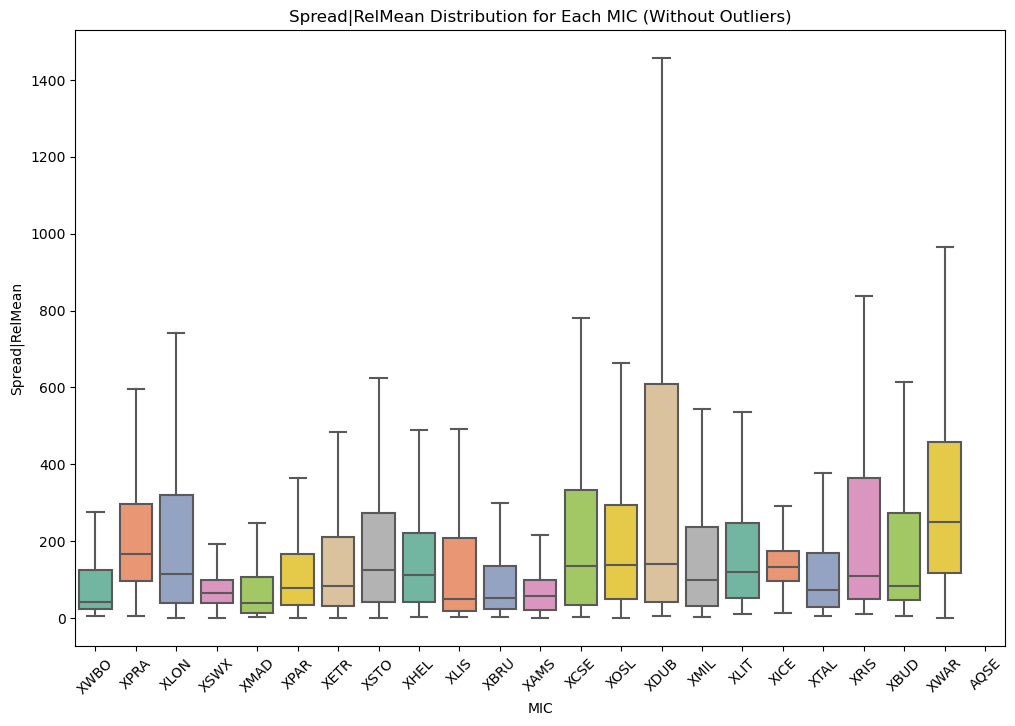

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting Spread|RelMean for each MIC without outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='MIC', y='Spread|RelMean', palette='Set2', showfliers=False)
plt.title('Spread|RelMean Distribution for Each MIC (Without Outliers)')
plt.xlabel('MIC')
plt.ylabel('Spread|RelMean')
plt.xticks(rotation=45)
#save the plot to Plots/Spread_RelMean_by_MIC.png
plt.savefig('Plots/Spread_RelMean_by_MIC.png')
plt.show()

